In [150]:
import seaborn as sns
import pandas as pd

train = pd.read_csv('Data_Train.csv',encoding='cp1252', nrows=1000)

train.head()


,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [151]:
train['Category'] = train['SECTION']
rem = {"Category": {0: "Politics", 1: "Technology", 2:"Entertainment", 3:"Business"}}
train = train.replace(rem)
train.head()

,STORY,SECTION,Category
0,But the most painful was the huge reversal in ...,3,Business
1,How formidable is the opposition alliance amon...,0,Politics
2,Most Asian currencies were trading lower today...,3,Business
3,"If you want to answer any question, click on ‘...",1,Technology
4,"In global markets, gold prices edged up today ...",3,Business


Text(0, 0.5, 'Количество')

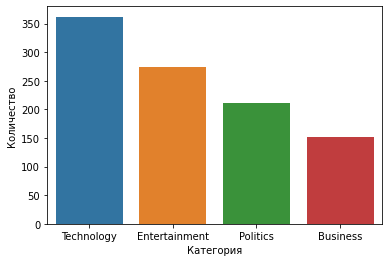

In [152]:
from matplotlib import pyplot as plt

count = train.Category.value_counts()
sns.barplot(x=count.index, y=count)
plt.xlabel('Категория')
plt.ylabel('Количество')

In [153]:
import nltk
import re
import string

def clean_text(text):
    text = text.lower()                                  # lower-case all characters
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text)
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return text

train['Text_cleaning'] = train.STORY.apply(clean_text)
train.head()

,STORY,SECTION,Category,Text_cleaning
0,But the most painful was the huge reversal in ...,3,Business,painful huge reversal fee income unheard among...
1,How formidable is the opposition alliance amon...,0,Politics,formidable opposition alliance among congress ...
2,Most Asian currencies were trading lower today...,3,Business,asian currencies trading lower today south kor...
3,"If you want to answer any question, click on ‘...",1,Technology,want answer question click answer clicking ans...
4,"In global markets, gold prices edged up today ...",3,Business,global markets gold prices edged today disappo...


In [154]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
data_vectorizer = vectorizer.fit_transform(train['Text_cleaning'])
label = train['SECTION']
print(data_vectorizer)

  (0, 7441)	1
  (0, 4930)	1
  (0, 8875)	1
  (0, 3886)	2
  (0, 5120)	2
  (0, 11141)	1
  (0, 434)	1
  (0, 8067)	1
  (0, 9312)	1
  (0, 5983)	1
  (0, 3569)	1
  (0, 6465)	2
  (0, 11832)	1
  (0, 934)	1
  (0, 10793)	1
  (0, 4510)	1
  (0, 3894)	2
  (0, 10184)	1
  (0, 6108)	2
  (0, 2666)	2
  (0, 7437)	1
  (0, 72)	1
  (0, 11214)	2
  (0, 1274)	1
  (0, 1292)	1
  :	:
  (998, 6566)	1
  (998, 10480)	1
  (998, 4790)	1
  (998, 10590)	1
  (998, 9754)	2
  (998, 5612)	1
  (998, 3422)	2
  (998, 1748)	1
  (998, 2010)	1
  (998, 15)	1
  (998, 2620)	1
  (998, 11500)	1
  (998, 10673)	1
  (998, 2627)	1
  (999, 3994)	1
  (999, 9559)	1
  (999, 8490)	1
  (999, 11622)	1
  (999, 9294)	1
  (999, 7781)	1
  (999, 8743)	1
  (999, 387)	1
  (999, 9752)	1
  (999, 3349)	1
  (999, 5651)	1


In [155]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_vectorizer, label, test_size=0.2, random_state=6)
my_Category =['Politics','Technology','Entertainment','Business']

In [156]:
from sklearn.svm import SVC

SVC_model = SVC()
SVC_model.fit(X_train,y_train)
SVC_pred = SVC_model.predict(X_test)

In [157]:
from sklearn.metrics import confusion_matrix

print("Показания прогноза относительно фактически верных меток")
print(SVC_model.score(X_test, y_test) * 100)
print('Матрица ошибок')
print(confusion_matrix(SVC_pred, y_test))


Показания прогноза относительно фактически верных меток
87.0
Матрица ошибок
[[37  0  0  0]
 [ 6 71  3  6]
 [ 2  5 47  4]
 [ 0  0  0 19]]
